In [1]:
library(ggplot2)
library(factoextra)
library(FactoMineR)

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
set.seed(27042012)

In [3]:
d=read.delim("cosmoss_V3.3.release.pep.ccd.txt",sep="\t",header=TRUE)
names(d)[1:3]=c("id","sites","len")
head(d)

id,sites,len,tertiary_deaminated,tertiary_oxidized_or_acetylated,secondary_ATE,secondary_peptidase,primary_acetylated
Pp3c10_10040V3.1,64,452,7,0,0,11,41
Pp3c10_10040V3.2,64,452,7,0,0,11,41
Pp3c10_10040V3.3,63,472,7,0,0,11,40
Pp3c10_10040V3.4,63,472,7,0,0,11,40
Pp3c10_10040V3.5,63,472,7,0,0,11,40
Pp3c10_10040V3.6,63,472,7,0,0,11,40


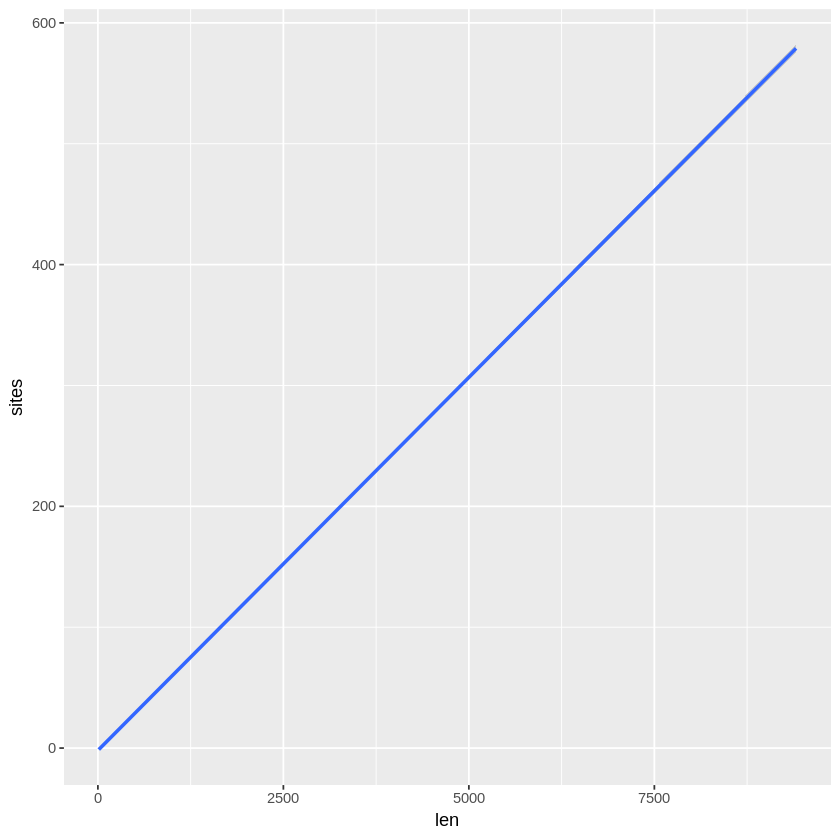

In [4]:
ggplot(d,aes(x=len,y=sites)) + geom_smooth(method=lm)

In [5]:
d$ratio=d$sites/d$len
d$lratio=log(d$ratio)

Warning message:
“Removed 3639 rows containing non-finite values (stat_density).”

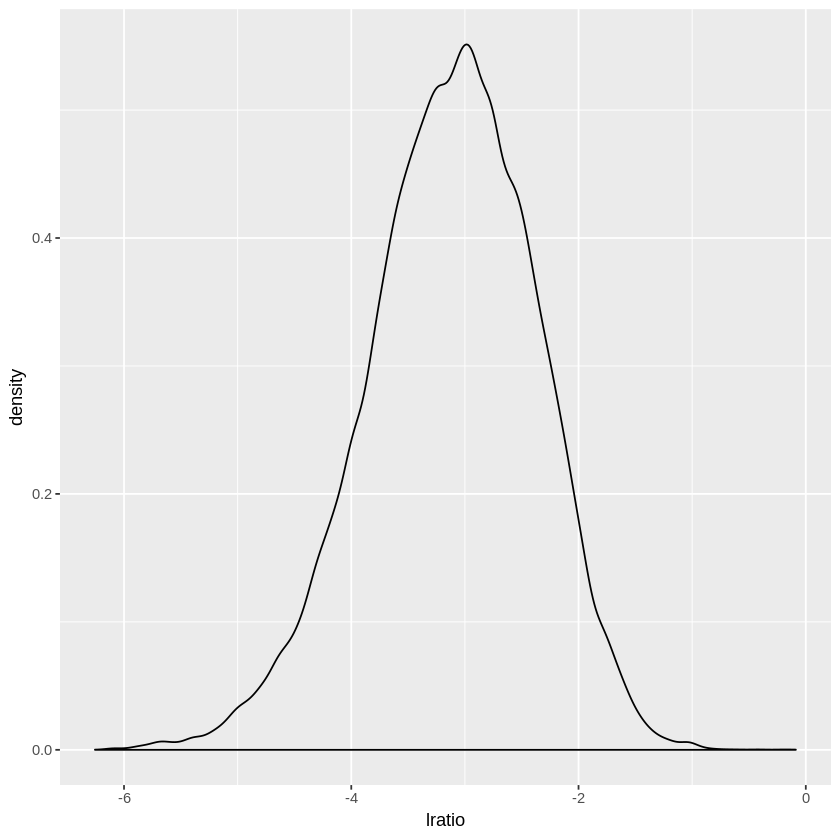

In [6]:
ggplot(d,aes(lratio))+geom_density()

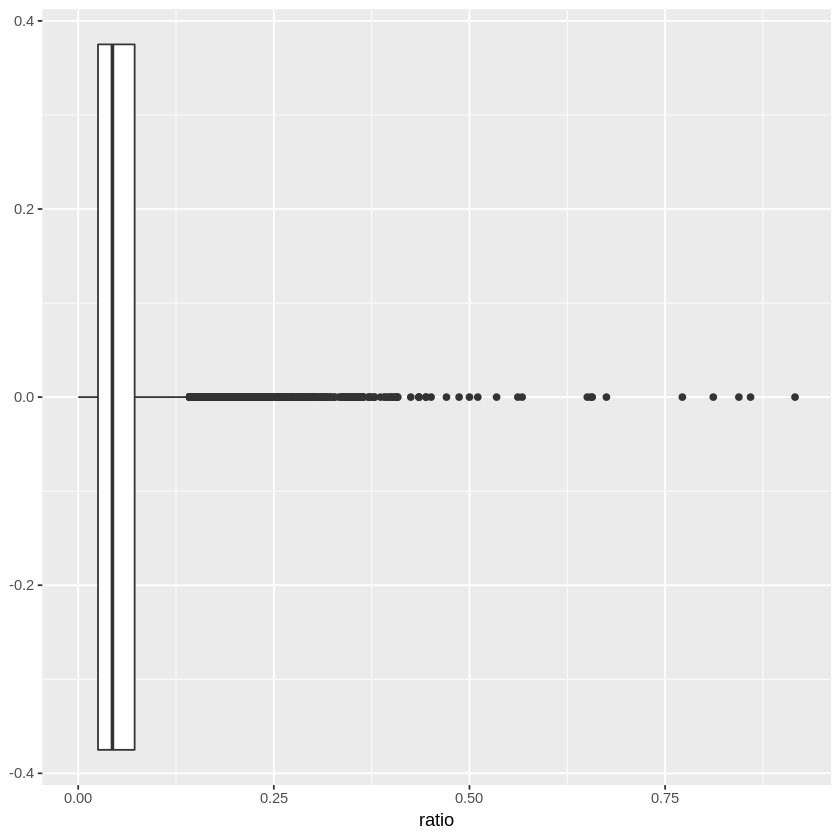

In [7]:
ggplot(d,aes(y=ratio))+ geom_boxplot() +coord_flip()

In [8]:
S0=subset(d, sites==0)
SX=subset(d,sites>0)

In [9]:
k=kmeans(SX$lratio,4)

In [10]:
order(k$centers)

[1] 3 2 4 1

In [11]:
table(ordered(k$cluster,levels=order(k$centers)))


    3     2     4     1 
10708 26455 30182 18483 

In [12]:
LC=ordered(k$cluster,levels=order(k$centers))
levels(LC)=paste("S",1:4,sep="")
table(LC)
SX=data.frame(SX,SLC=as.character(LC))

LC
   S1    S2    S3    S4 
10708 26455 30182 18483 

In [13]:
S=rbind(data.frame(S0,SLC="S0"),SX)
S$SLC=ordered(S$SLC,levels=paste("S",0:4,sep=""))
table(S$SLC)


   S0    S1    S2    S3    S4 
 3639 10708 26455 30182 18483 

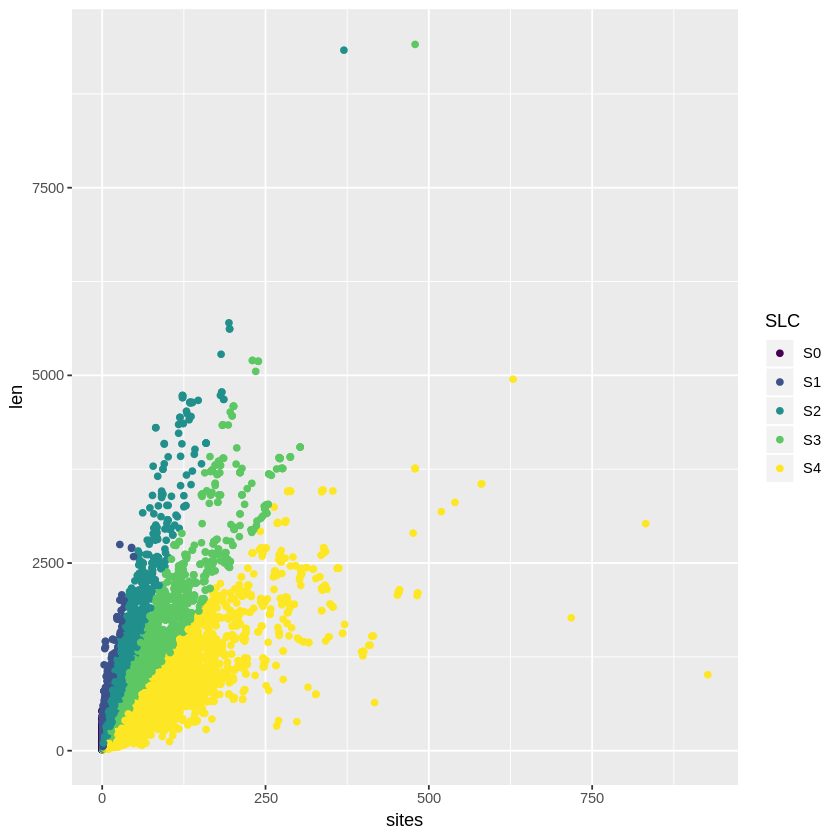

In [14]:
ggplot(S,aes(y=len,x=sites,fill=SLC,colour=SLC))+ geom_point()

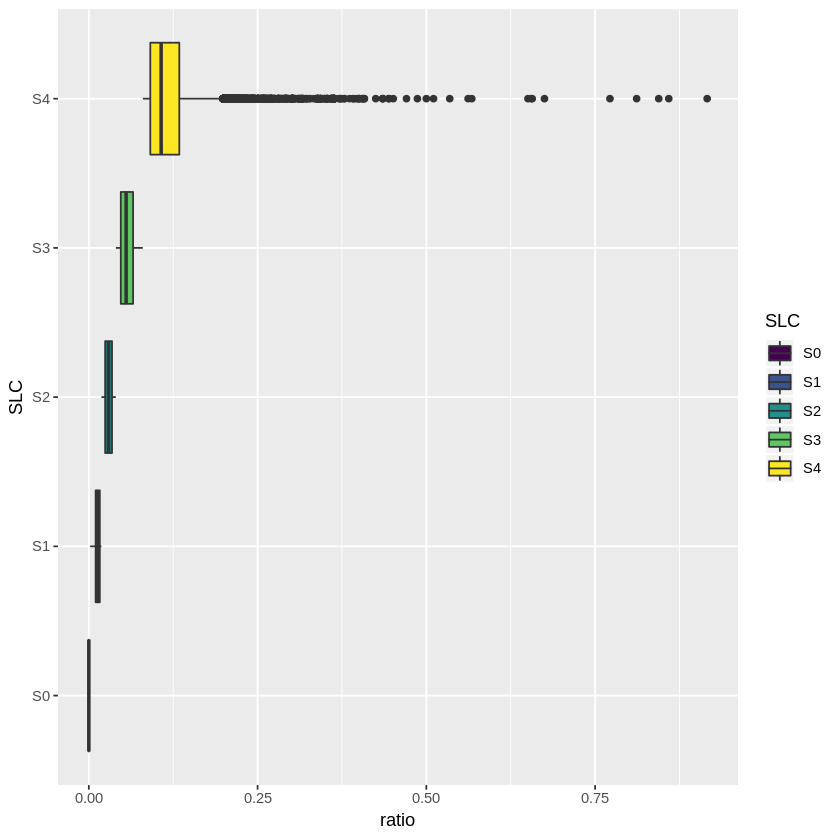

In [15]:
ggplot(S,aes(x=SLC,y=ratio,fill=SLC)) +geom_boxplot() +coord_flip()

## N-end rule degradation (NERD) pathway after calpain cleavage
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5083111/


<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5083111/" target="_blank"><img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5083111/bin/zjw0061653390001.jpg" title="Hoernstein et al. 2016"></a>


In [18]:
summary(d)

               id            sites             len         tertiary_deaminated
 Pp3c1_10000V3.1:    1   Min.   :  0.00   Min.   :  12.0   Min.   :  0.000    
 Pp3c1_10000V3.2:    1   1st Qu.:  7.00   1st Qu.: 183.0   1st Qu.:  0.000    
 Pp3c1_1000V3.1 :    1   Median : 16.00   Median : 367.0   Median :  1.000    
 Pp3c1_1000V3.2 :    1   Mean   : 25.91   Mean   : 451.4   Mean   :  2.038    
 Pp3c1_1000V3.3 :    1   3rd Qu.: 32.00   3rd Qu.: 580.0   3rd Qu.:  3.000    
 Pp3c1_10010V3.1:    1   Max.   :927.00   Max.   :9409.0   Max.   :207.000    
 (Other)        :89461                                                        
 tertiary_oxidized_or_acetylated secondary_ATE     secondary_peptidase
 Min.   :0.00000                 Min.   :  0.000   Min.   : 0.000     
 1st Qu.:0.00000                 1st Qu.:  0.000   1st Qu.: 1.000     
 Median :0.00000                 Median :  0.000   Median : 4.000     
 Mean   :0.07136                 Mean   :  1.018   Mean   : 5.831     
 3rd Qu.:0.00

In [19]:
D=d[,-c(1,3,9:10)]/d[,3]
row.names(D)=d[,1]
head(D)

,sites,tertiary_deaminated,tertiary_oxidized_or_acetylated,secondary_ATE,secondary_peptidase,primary_acetylated
Pp3c10_10040V3.1,0.1415929,0.01548673,0,0,0.02433628,0.09070796
Pp3c10_10040V3.2,0.1415929,0.01548673,0,0,0.02433628,0.09070796
Pp3c10_10040V3.3,0.1334746,0.01483051,0,0,0.02330508,0.08474576
Pp3c10_10040V3.4,0.1334746,0.01483051,0,0,0.02330508,0.08474576
Pp3c10_10040V3.5,0.1334746,0.01483051,0,0,0.02330508,0.08474576
Pp3c10_10040V3.6,0.1334746,0.01483051,0,0,0.02330508,0.08474576


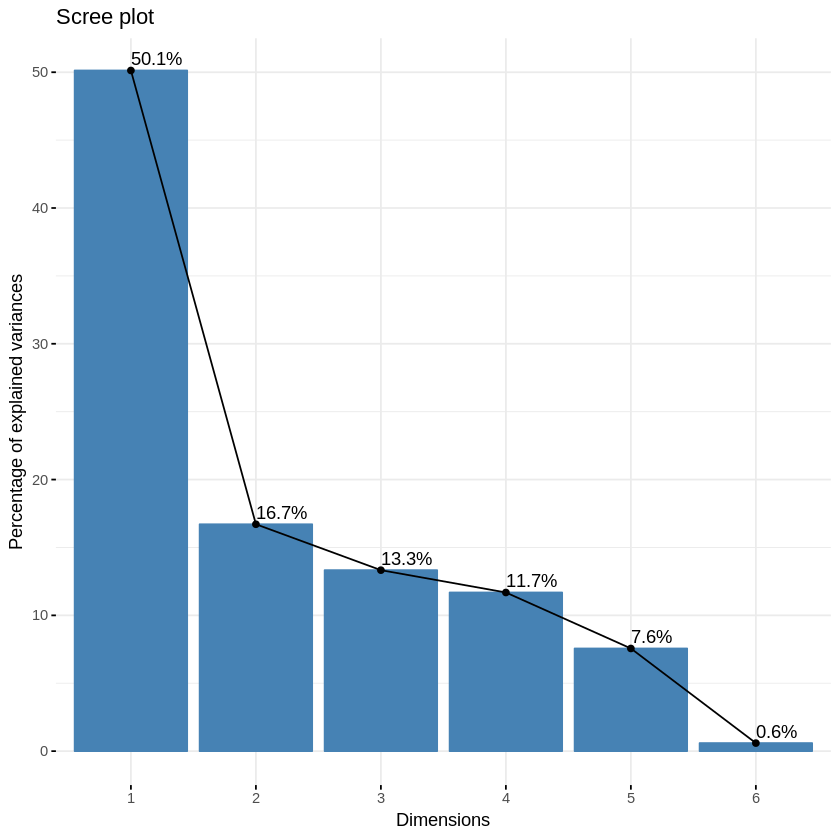

In [20]:
res.pca=PCA(D,  graph = FALSE)
var = get_pca_var(res.pca)
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

In [21]:
var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
sites,31.3768004,0.03141412,0.4537496,1.9489907,3.6286631
tertiary_deaminated,12.4477469,0.38372164,28.5921552,54.0321789,3.0508061
tertiary_oxidized_or_acetylated,0.2147128,97.84905636,0.5069659,0.8637939,0.5436987
secondary_ATE,9.9320327,1.46814209,70.0751785,17.5800665,0.6303611
secondary_peptidase,20.1762003,0.11772302,0.1003725,20.5521525,54.0833565
primary_acetylated,25.8525070,0.14994276,0.2715782,5.0228175,38.0631144


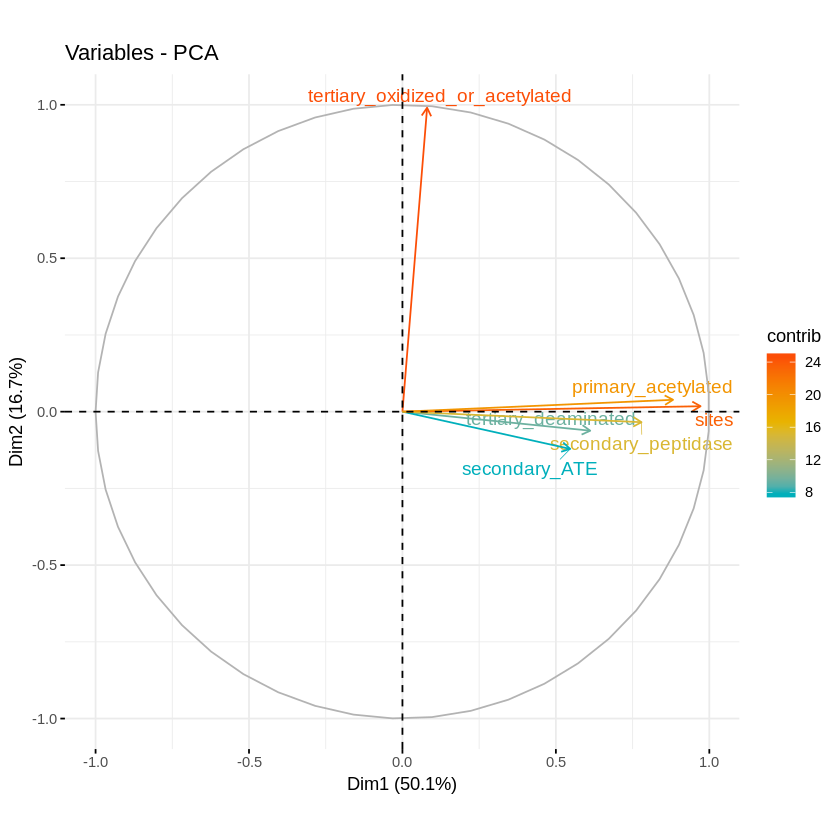

In [22]:
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping
             axes=c(1,2)
)

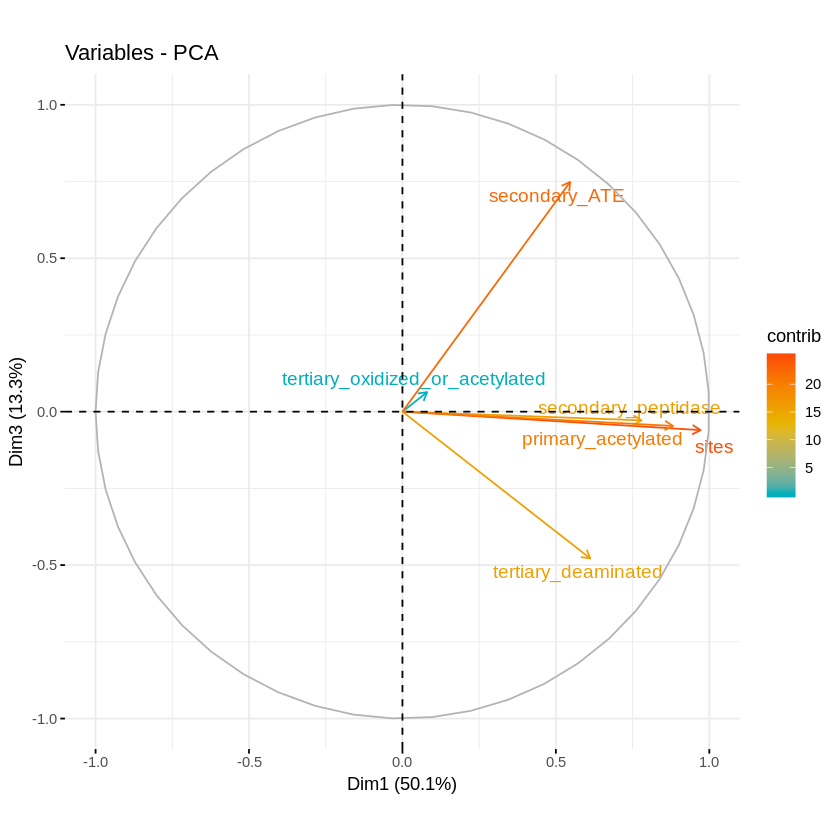

In [23]:
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping
             axes=c(1,3)
)

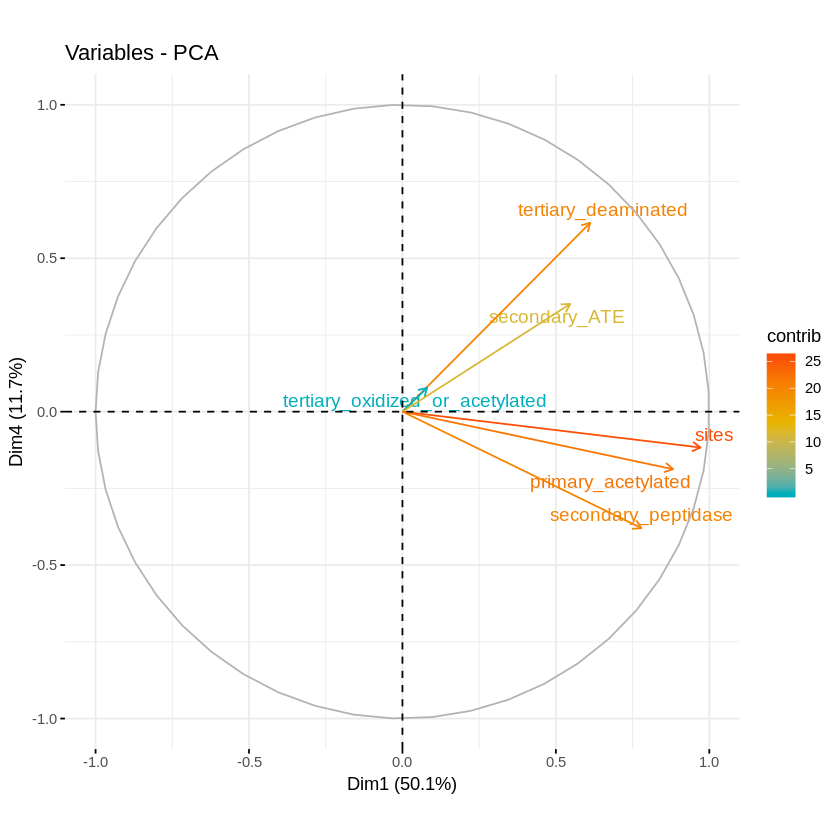

In [24]:
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping
             axes=c(1,4)
)

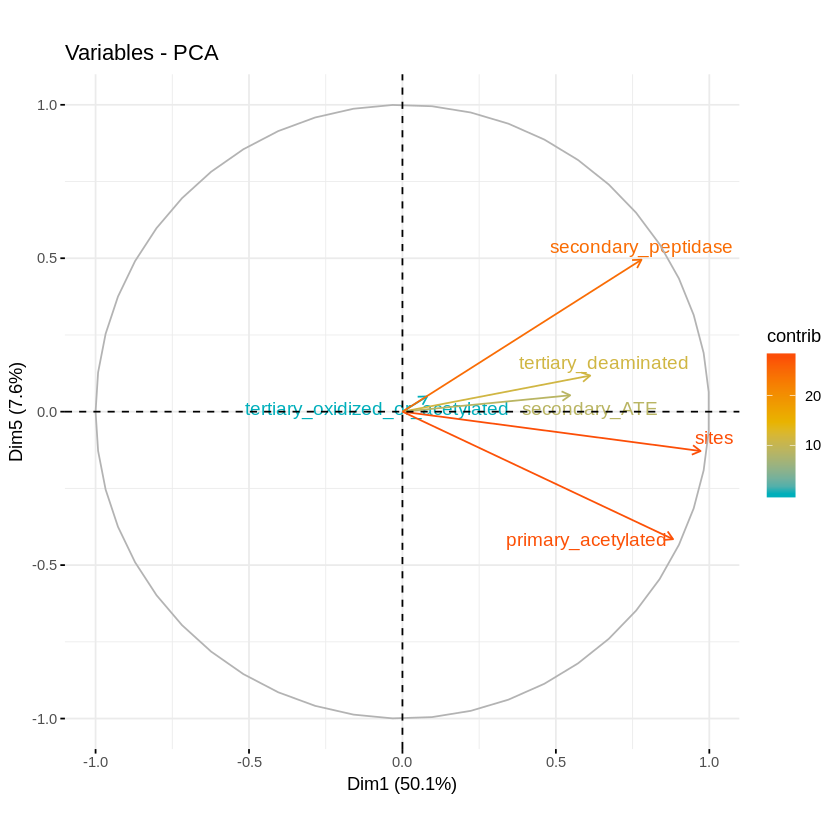

In [25]:
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping
             axes=c(1,5)
)

In [31]:
head(res.pca$ind$coord[,-1])

,Dim.2,Dim.3,Dim.4,Dim.5
Pp3c10_10040V3.1,-0.1247437,-1.738237,-0.1971919,-0.8264861
Pp3c10_10040V3.2,-0.1247437,-1.738237,-0.1971919,-0.8264861
Pp3c10_10040V3.3,-0.1276297,-1.656845,-0.1566803,-0.7310523
Pp3c10_10040V3.4,-0.1276297,-1.656845,-0.1566803,-0.7310523
Pp3c10_10040V3.5,-0.1276297,-1.656845,-0.1566803,-0.7310523
Pp3c10_10040V3.6,-0.1276297,-1.656845,-0.1566803,-0.7310523


In [32]:
library(mclust)

Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.


In [34]:
M=Mclust(res.pca$ind$coord,G=1:10)

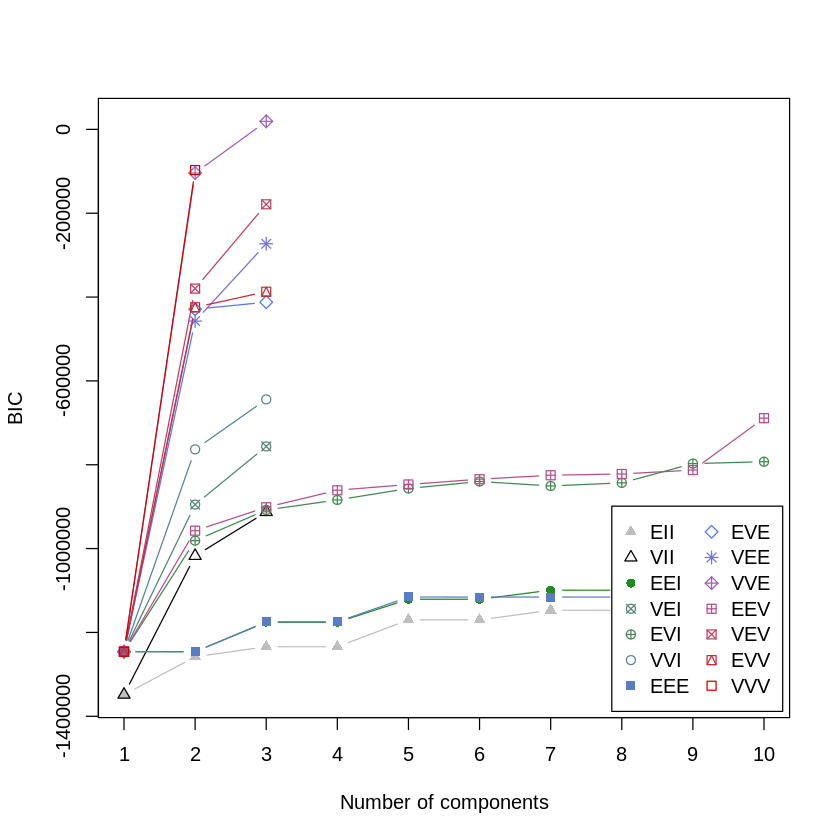

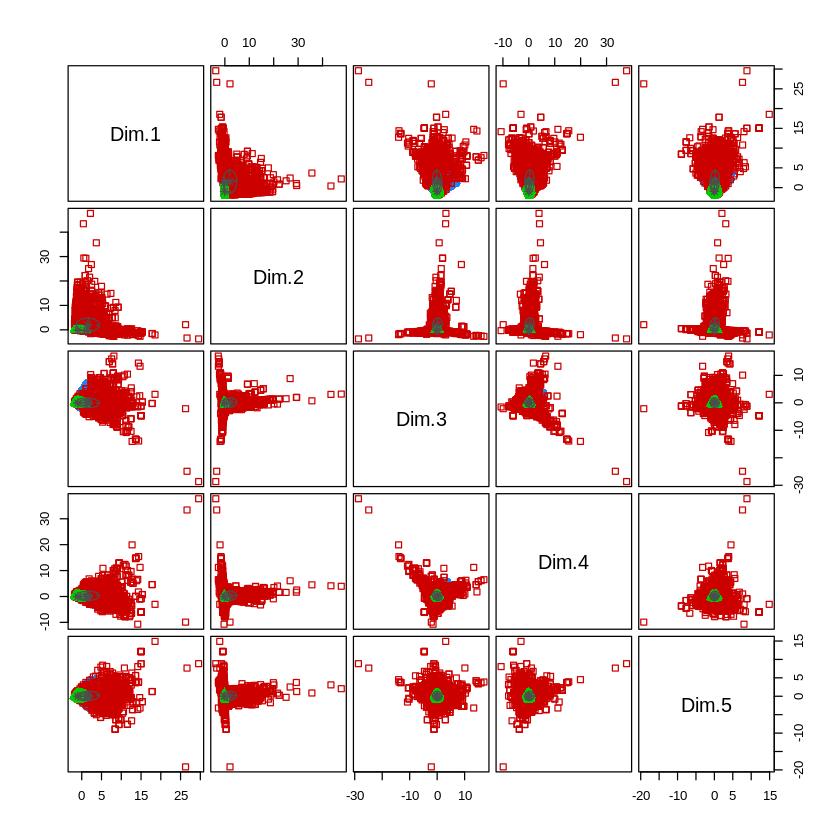

In [36]:
plot(M)

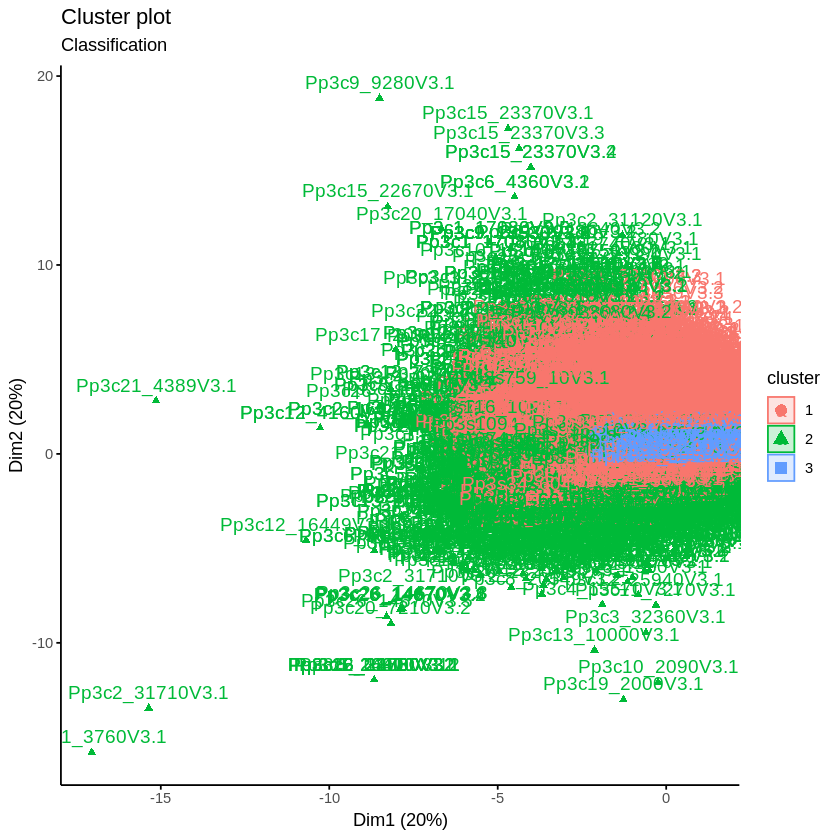

In [37]:
fviz_mclust(M,what="classification")

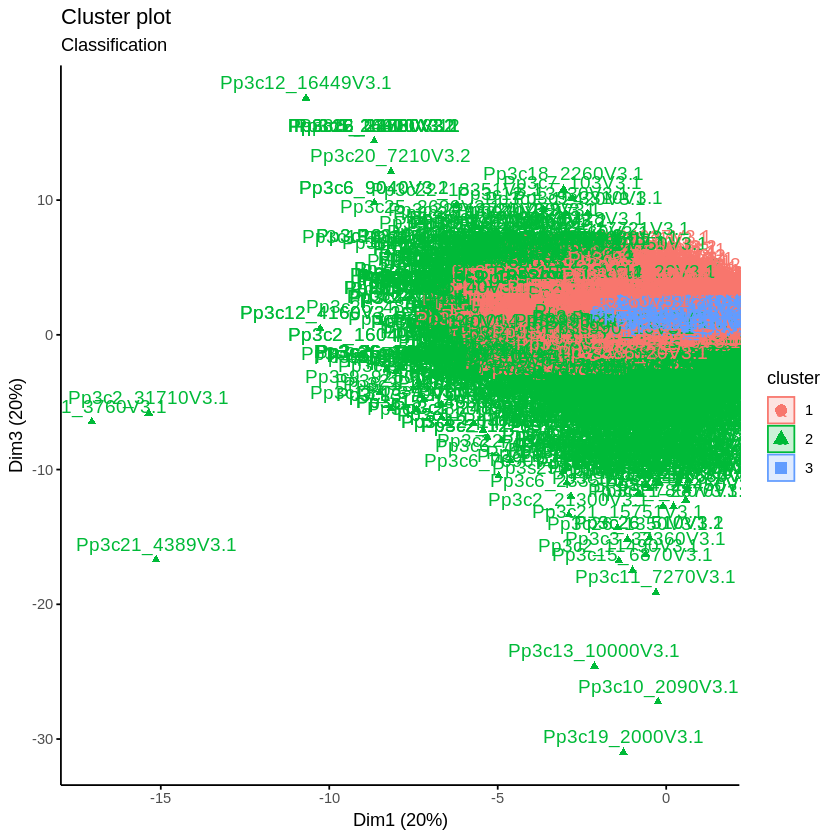

In [48]:
fviz_mclust(M,what="classification",axes=c(1,3))

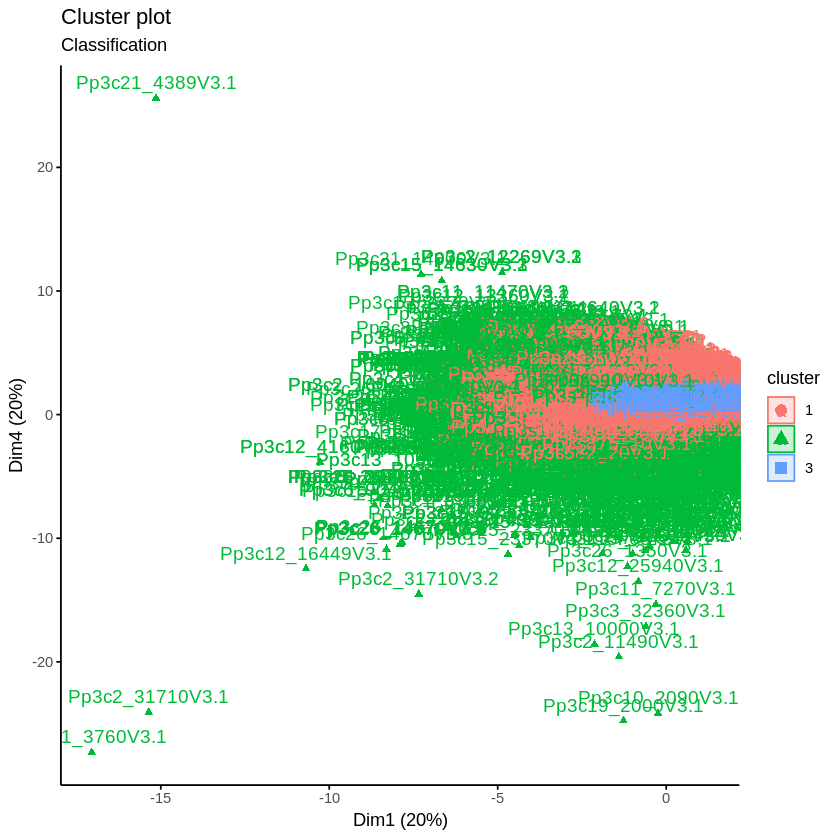

In [54]:
fviz_mclust(M,what="classification",axes=c(1,4))

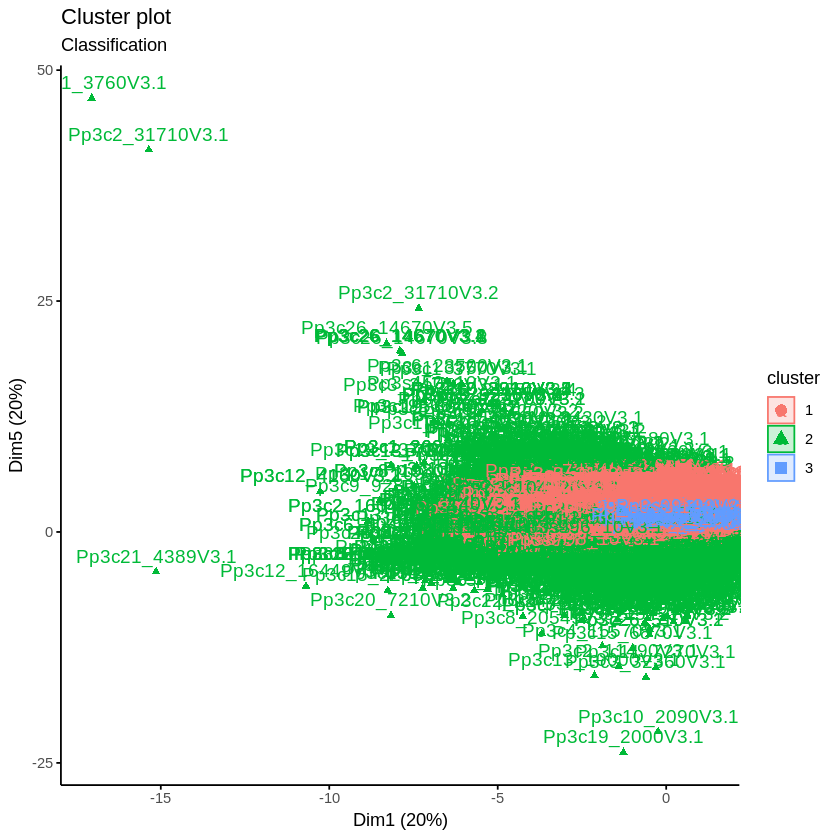

In [55]:
fviz_mclust(M,what="classification",axes=c(1,5))

In [56]:
aggregate(D,by=list(M$classification), median)
aggregate(D,by=list(M$classification), quantile,0.25)
aggregate(D,by=list(M$classification), quantile,0.75)

table(M$classification)

Group.1,sites,tertiary_deaminated,tertiary_oxidized_or_acetylated,secondary_ATE,secondary_peptidase,primary_acetylated
1,0.07865169,0.005235602,0.000000000,0.002979146,0.017857143,0.04516129
2,0.06993007,0.004081633,0.001631321,0.001841621,0.013921114,0.03773585
3,0.02953586,0.001340483,0.000000000,0.000000000,0.007220217,0.01735358


Group.1,sites,tertiary_deaminated,tertiary_oxidized_or_acetylated,secondary_ATE,secondary_peptidase,primary_acetylated
1,0.05660377,0.000000000,0.0000000000,0,0.010178117,0.027972028
2,0.04461942,0.001449275,0.0008467401,0,0.007874016,0.023575639
3,0.01792829,0.000000000,0.0000000000,0,0.003067485,0.009950249


Group.1,sites,tertiary_deaminated,tertiary_oxidized_or_acetylated,secondary_ATE,secondary_peptidase,primary_acetylated
1,0.10434783,0.010101010,0.000000000,0.005830904,0.02571429,0.06201550
2,0.11172161,0.007975693,0.002739726,0.004043127,0.02190722,0.06129597
3,0.04295096,0.003597122,0.000000000,0.001637555,0.01147228,0.02611940



    1     2     3 
31852  6929 50686 

In [104]:
Mz=M$z
colnames(Mz)=paste("U",1:3,sep="")
SD=merge(S,data.frame(D,clust=M$classification,uncertainty=M$uncertainty,Mz),by.x=1,by.y=0,suffixes = c("_raw","_rel"))
head(SD)

id,sites_raw,len,tertiary_deaminated_raw,tertiary_oxidized_or_acetylated_raw,secondary_ATE_raw,secondary_peptidase_raw,primary_acetylated_raw,ratio,lratio,⋯,tertiary_deaminated_rel,tertiary_oxidized_or_acetylated_rel,secondary_ATE_rel,secondary_peptidase_rel,primary_acetylated_rel,clust,uncertainty,U1,U2,U3
Pp3c1_10000V3.1,23,579,0,0,0,6,13,0.03972366,-3.225808,⋯,0.000000000,0,0.000000000,0.010362694,0.02245250,3,0.02949464,0.0294939,7.361153e-07,0.9705054
Pp3c1_10000V3.2,23,579,0,0,0,6,13,0.03972366,-3.225808,⋯,0.000000000,0,0.000000000,0.010362694,0.02245250,3,0.02949464,0.0294939,7.361153e-07,0.9705054
Pp3c1_1000V3.1,25,387,0,0,0,6,16,0.06459948,-2.739549,⋯,0.000000000,0,0.000000000,0.015503876,0.04134367,1,0.36506797,0.6349320,1.239217e-05,0.3650556
Pp3c1_1000V3.2,25,387,0,0,0,6,16,0.06459948,-2.739549,⋯,0.000000000,0,0.000000000,0.015503876,0.04134367,1,0.36506797,0.6349320,1.239217e-05,0.3650556
Pp3c1_1000V3.3,25,387,0,0,0,6,16,0.06459948,-2.739549,⋯,0.000000000,0,0.000000000,0.015503876,0.04134367,1,0.36506797,0.6349320,1.239217e-05,0.3650556
Pp3c1_10010V3.1,25,634,3,0,1,2,14,0.03943218,-3.233173,⋯,0.004731861,0,0.001577287,0.003154574,0.02208202,3,0.09267909,0.0926765,2.596376e-06,0.9073209


In [105]:
table(SD$SLC,SD$clust)

    
         1     2     3
  S0     0     0  3639
  S1   653   178  9877
  S2  3069  1250 22136
  S3 12637  2574 14971
  S4 15493  2927    63

In [106]:
aggregate(SD[,grep("_raw",names(SD))],by=list(SD$SLC,SD$clust),median)

Group.1,Group.2,sites_raw,tertiary_deaminated_raw,tertiary_oxidized_or_acetylated_raw,secondary_ATE_raw,secondary_peptidase_raw,primary_acetylated_raw
S1,1,1.0,0,0,0,0,0
S2,1,5.0,0,0,1,1,2
S3,1,17.0,1,0,1,4,9
S4,1,38.0,3,0,1,8,22
S1,2,6.0,0,1,0,1,3
S2,2,15.5,1,1,0,3,9
S3,2,33.0,2,1,1,7,19
S4,2,54.0,3,1,2,10,29
S0,3,0.0,0,0,0,0,0
S1,3,3.0,0,0,0,1,2


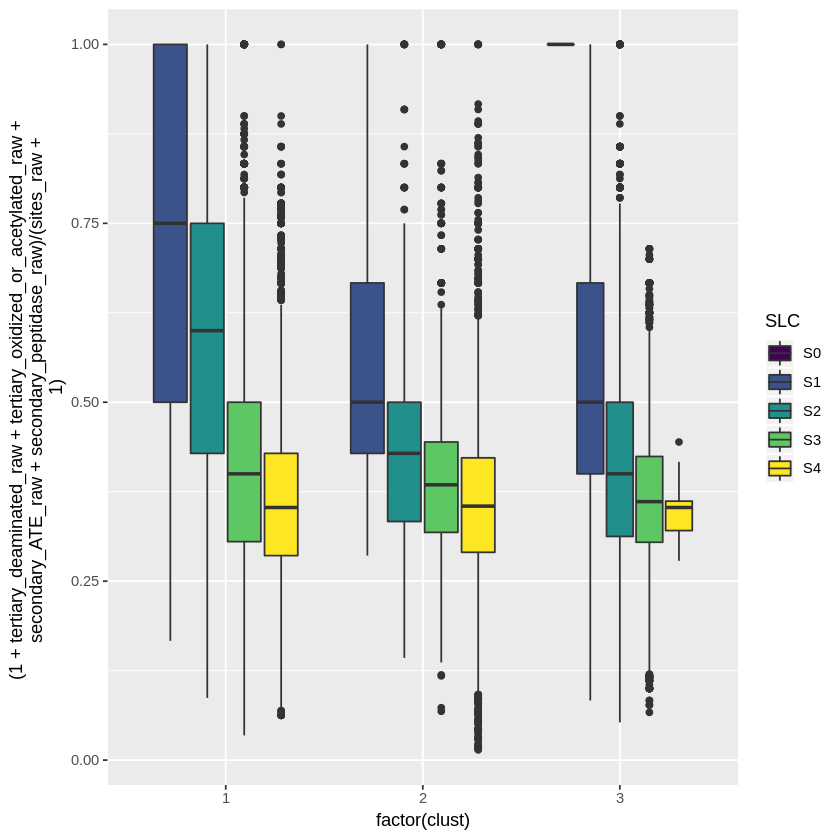

In [107]:
ggplot(SD,aes(x=factor(clust),y=(1+tertiary_deaminated_raw+tertiary_oxidized_or_acetylated_raw+secondary_ATE_raw+secondary_peptidase_raw)/(sites_raw+1) ,fill=SLC)) + geom_boxplot() 

In [115]:
SD$fate=ifelse(SD$SLC=="S0","unchanged",ifelse(SD$clust!=3,"NERD","other"))
SD$fate_strict=ifelse(SD$SLC=="S0","unchanged",ifelse(SD$clust!=3,ifelse(SD$U3<0.05,"NERD","other"),"other"))
table(SD$fate,SD$uncertainty<0.05)
table(SD$fate,SD$U3<0.05)
table(SD$fate_strict)

           
            FALSE  TRUE
  NERD       7964 30817
  other     12217 34830
  unchanged     0  3639

           
            FALSE  TRUE
  NERD       7088 31693
  other     47047     0
  unchanged  3639     0


     NERD     other unchanged 
    31693     54135      3639 

In [110]:
head(SD,3)

id,sites_raw,len,tertiary_deaminated_raw,tertiary_oxidized_or_acetylated_raw,secondary_ATE_raw,secondary_peptidase_raw,primary_acetylated_raw,ratio,lratio,⋯,tertiary_oxidized_or_acetylated_rel,secondary_ATE_rel,secondary_peptidase_rel,primary_acetylated_rel,clust,uncertainty,U1,U2,U3,fate
Pp3c1_10000V3.1,23,579,0,0,0,6,13,0.03972366,-3.225808,⋯,0,0,0.01036269,0.02245250,3,0.02949464,0.0294939,7.361153e-07,0.9705054,other
Pp3c1_10000V3.2,23,579,0,0,0,6,13,0.03972366,-3.225808,⋯,0,0,0.01036269,0.02245250,3,0.02949464,0.0294939,7.361153e-07,0.9705054,other
Pp3c1_1000V3.1,25,387,0,0,0,6,16,0.06459948,-2.739549,⋯,0,0,0.01550388,0.04134367,1,0.36506797,0.6349320,1.239217e-05,0.3650556,NERD


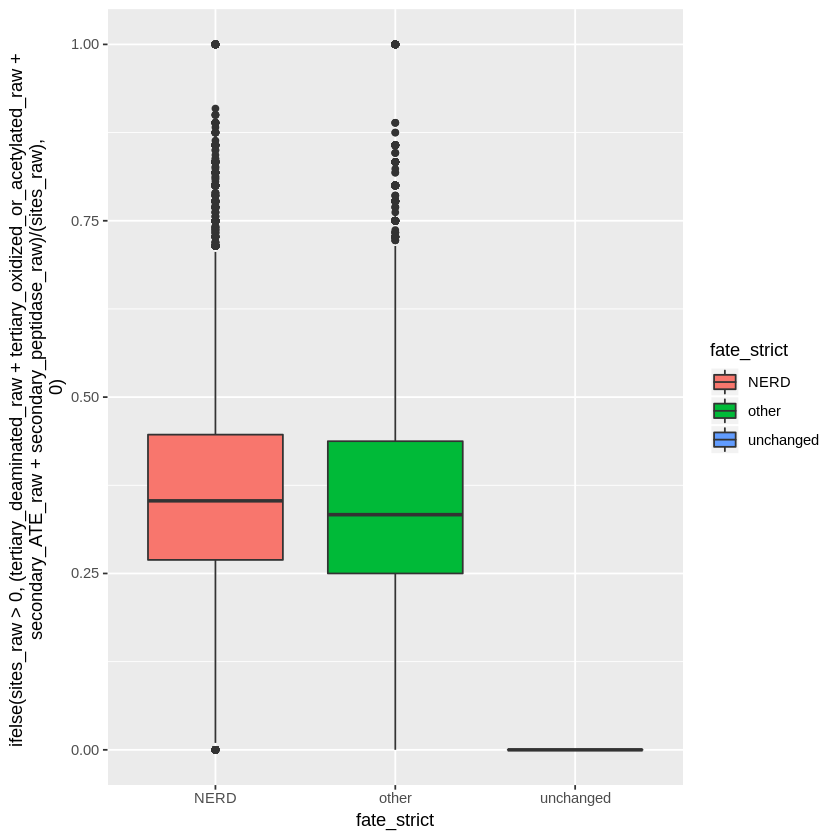

In [118]:
ggplot(SD,aes(x=fate_strict,y=ifelse(sites_raw>0,(tertiary_deaminated_raw+tertiary_oxidized_or_acetylated_raw+secondary_ATE_raw+secondary_peptidase_raw)/(sites_raw),0) ,fill=fate_strict)) + geom_boxplot() 

In [124]:
write.table(S,file="cosmoss_V3.3.release.pep.ccd.site_abundance_classification.txt",sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)
write.table(SD,file=gzfile("cosmoss_V3.3.release.pep.ccd.NERD_classification.tsv.gz"),sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)